# Закономерности определяющие успешность игры

## Описание  
  
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.   Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
*Примечание*  
* Данные за 2016 год могут быть неполными.  
  
*Описание данных*  
`Name` — название игры    
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Изучение данных из файла

In [1]:
#импорт таблиц и библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

warnings.filterwarnings("ignore") # игнорировать сообщение об ошибке

df = pd.read_csv('/datasets/games.csv')

In [2]:
# Общая информация.
print('Общая информация \n')
df.info()
print(30 * '= ')

# Вывод первых 5 строк датафрейма.
print('Первые 5 строк датафрейма')
display(df.head())
print(30 * '= ')

# Названия столбцов.
print(f'Названия столбцов: {list(df.columns)}')
print(30 * '= ')

# Пропуски.
print('Инофрмация о пропусках')
display(df.isna().sum())
print(30 * '= ')

# Полные дубликаты.
print(f'Полных дубликатов: {df.duplicated().sum()}')
print(60*'=')



Общая информация 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Первые 5 строк датафрейма


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Названия столбцов: ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Инофрмация о пропусках


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Полных дубликатов: 0


In [3]:
df.query('Name.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [4]:
def unique(data):
    '''Функция для анализа уникальных значений в столбцах.'''
    
    for gg in data:
        print(f'Столбец {data[gg].name}')
        print(data[gg].unique())
unique(df)

Столбец Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Столбец Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Столбец Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Столбец Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Столбец NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+0

### Вывод  
  
* DF содержит 16715 строк и 11 столбцов.  
* Название столбцов необходимо привести к нижнему регистру.  
* Пропуски есть в столбцах `name`, `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`.  
* Строки с пустым значением в столбце `name`, так же не содержат данных в других важных для анализа столбцах(жанр, оценки).
Поэтому их можно удалить.  
* Пропуски в столбце `rating` можно заполнить RP (raiting pending - Ожидается присвоение рейтинга)
* Пропуски в других столбцах лучше не заполнять, т.к. нет ориентира и можно исказить данные.  
* В столбце `user_score` есть значение tbd. По всей видимости это "to be determined".  
* В столбцах `year_of_release`, `critic_score` необходимо формат привести к Int64. 
* Продажи по регионам и пользовательские оценки не целые числа. Менять формат не нужно, иначе данные округлятся, что может повлиять на анализ

## Шаг 2. Подготовка данных.

In [5]:
df.columns = map(str.lower, df.columns) # название столбцов к нижнему регистру

In [6]:
# создание столбца с продажами по всем регионам
df['world_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales 

In [7]:
df.dropna(subset = ['name'], inplace = True) # удаление строк с пусным name

In [8]:
df['rating'] = df['rating'].fillna('RP') # заполнил пустоту в столбце rating

In [9]:
# меняю формат столбцов на Int64
df.year_of_release = df.year_of_release.astype('Int64')
#df.critic_score = df.critic_score.astype('Int64')

In [10]:
df.info() # проверка изменений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
 11  world_sales      16713 non-null  float64
dtypes: Int64(1), float64(6), object(5)
memory usage: 1.7+ MB


In [11]:
df.isna().sum() # проверка изменений

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
world_sales           0
dtype: int64

## Шаг 3. Исследовательский анализ данных

### Год выпуска

<AxesSubplot:>

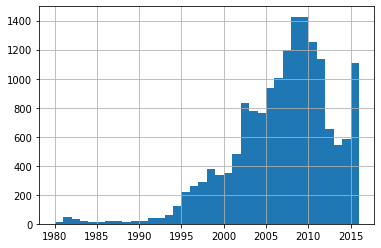

In [12]:
df.year_of_release.hist(bins = 36) # гистограмма для год выпуска

In [13]:
# объем продаж для каждой платформы
(df.pivot_table(index = 'platform', values = 'world_sales', aggfunc = ('sum'))
                 .sort_values('world_sales', ascending = False))

,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [14]:
# создание таблицы для топ-6 платформ
df_top6 = (
    df.loc[df['platform']
           .isin(
               df.groupby('platform')['world_sales']
               .sum()
               .reset_index()
               .sort_values('world_sales', ascending = False)
               .head(6)['platform']
           )])

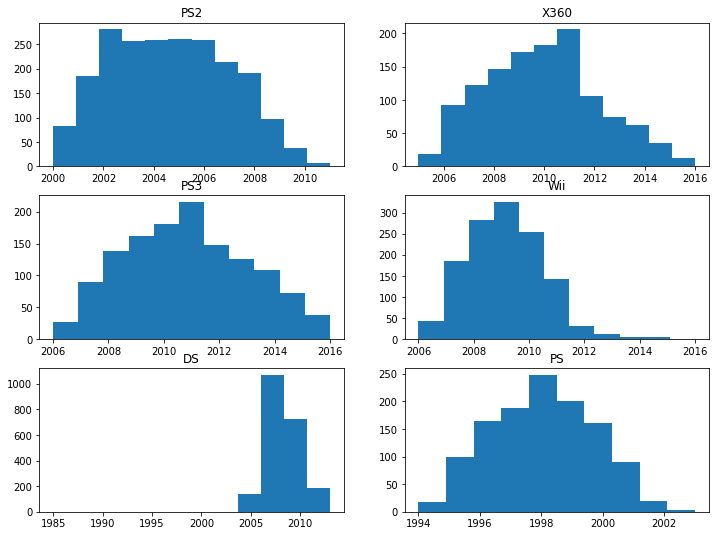

In [15]:
# гистаграмма для каждой платформы топ-6, год выпуска
plt.figure(figsize=(12, 9))

plt.subplot(3,2,1)
plt.hist(df_top6.query('platform == "PS2" and year_of_release.isna() == False')['year_of_release'], bins = 12)
plt.title('PS2')

plt.subplot(3,2,2)
plt.hist(df_top6.query('platform == "X360"and year_of_release.isna() == False')['year_of_release'], bins = 12)
plt.title('X360')

plt.subplot(3,2,3)
plt.hist(df_top6.query('platform == "PS3" and year_of_release.isna() == False')['year_of_release'], bins = 11)
plt.title('PS3')

plt.subplot(3,2,4)
plt.hist(df_top6.query('platform == "Wii"and year_of_release.isna() == False')['year_of_release'], bins = 11)
plt.title('Wii')

plt.subplot(3,2,5)
plt.hist(df_top6.query('platform == "DS" and year_of_release.isna() == False')['year_of_release'], bins = 12)
plt.title('DS')

plt.subplot(3,2,6)
plt.hist(df_top6.query('platform == "PS"and year_of_release.isna() == False')['year_of_release'], bins = 10)
plt.title('PS')

plt.show()


In [16]:
# мин и макс год выпуска для каждой платформы
data = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = (min, max)).reset_index()
data['duration'] = data['max'] - data['min'] # диапозон между первым и последним выпуском
data['duration'].mean() # среднее диапозона

7.612903225806452

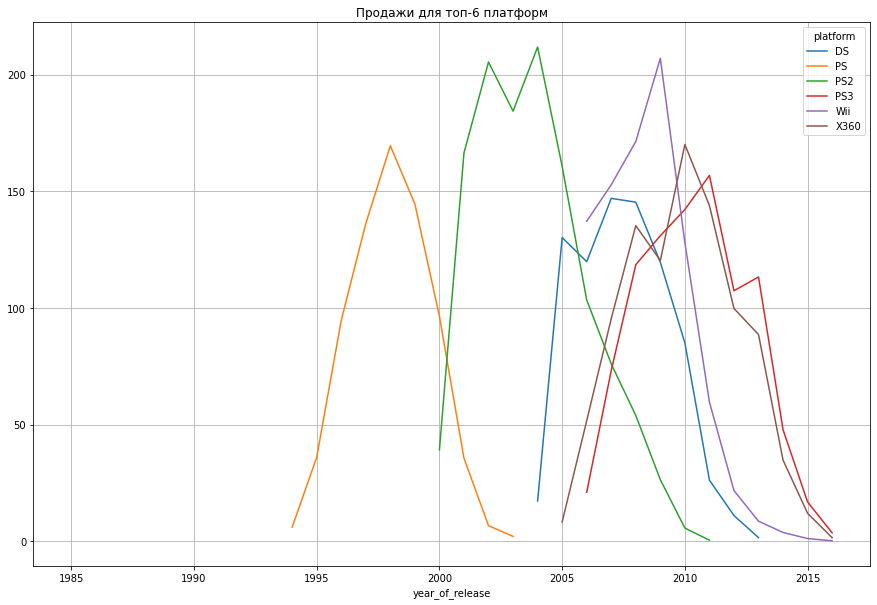

In [17]:
# график продаж для топ-6
(
    df_top6.pivot_table(index = 'year_of_release', columns = 'platform', values = 'world_sales', aggfunc = sum)
    .plot(grid=True, figsize = (15,10), title = 'Продажи для топ-6 платформ'))
plt.show()

In [18]:
# отбросим игры выпущенные до 2012 года
df_since_2012 = df.query('year_of_release >= 2012')

#### Описание действий  
  
Построил гистаграмму распределение для "Год выпуска" по всей таблице.  
Посчитал продажы для каждой платформы.  
Для топ-6 платформ построил гистаграммы для "Год выпуска".  
И посчитал среднюю продолжительность "жизни" по всем платформам.  

#### Вывод  

Судя по общей гистаграмме скачек продаж произошел примерно в 2002 году и рос до 2010 года включительно.  
Топ-6 по продажам PS2, X360, PS3, Wii, DS, PS.  
Распределения по году выпуска разные для каждой платформы:  
* PS2 - первые 2 года рост, 4 года выпуск был равномерный, и потом плавный спад  
* X360 - первые 6 лет рост, и потом резкий спад  
* PS3 - постепенный рост и такой же спад  
* Wii - постепенный рост 3 года и такой же спад, и потом резкий спад.  
* DS - 20 лет выпускали очень мало игр, потом резкий рост в гачале 2000 и постепенный спад  
* PS - постепенный рост и такой же спад  

Жизнь топовых платформ 10-11 лет, активные годы меньше 6-7 лет. Кроме старейшей платформы DS.  
Средняя продолжительность жизни всех платформ 7,5 лет  
Рост и пик примерно 3-4 года
  
Исходя из этого для дальнейшего анализа возьмем данные за последние 4 года с 2012 года

### Потенциально прибыльные платформы

In [19]:
# уникальные значения платформ в 2016
platforms_2016 = pd.DataFrame({'platform': df_since_2012.query('year_of_release == 2016')['platform'].unique()})

# создание таблицы с видами платформ для живых платформ 2016
type_platform = pd.DataFrame({'type_platform':
    ['домашняя', 'портативная', 'домашняя', 'портативная', 'домашняя', 'компьютер', 'домашняя', 'портативная', 'домашняя']})

platforms_2016 = platforms_2016.join(type_platform) # объединения таблиц.

# объединение таблиц для создание столбца с видами платформ
df_since_2012 = df_since_2012.merge(platforms_2016, how = 'left', on = 'platform') 

# отбросил платформы не "живые" в 2016
df_since_2012 = df_since_2012.query('platform.isin(@platforms_2016["platform"])')


In [20]:
# объем продаж для каждой платформы
(df_since_2012.pivot_table(index = ['platform', 'type_platform'], values = 'world_sales', aggfunc = ('sum'))
                 .sort_values('world_sales', ascending = False))

,,world_sales
platform,type_platform,
PS4,домашняя,314.14
PS3,домашняя,288.79
X360,домашняя,236.54
3DS,портативная,194.61
XOne,домашняя,159.32
WiiU,портативная,82.19
PC,компьютер,62.65
PSV,портативная,49.18
Wii,домашняя,35.37


In [21]:
# сводная таблица с подсчетом суммы продаж и количества выпущенных игр
release_ratio = (
    df_since_2012
    .pivot_table(index = ['platform', 'year_of_release', 'type_platform'], values = 'world_sales', aggfunc = ('sum', 'count'))
    .reset_index()
)

release_ratio['ratio'] = release_ratio['count'] / release_ratio['sum'] #создание столбца с коэф.

release_ratio

,platform,year_of_release,type_platform,count,sum,ratio
0,3DS,2012,портативная,93,51.36,1.810748
1,3DS,2013,портативная,91,56.57,1.608626
2,3DS,2014,портативная,80,43.76,1.828154
3,3DS,2015,портативная,86,27.78,3.095752
4,3DS,2016,портативная,46,15.14,3.038309
5,PC,2012,компьютер,61,23.22,2.627046
6,PC,2013,компьютер,38,12.38,3.069467
7,PC,2014,компьютер,47,13.28,3.539157
8,PC,2015,компьютер,50,8.52,5.868545
9,PC,2016,компьютер,54,5.25,10.285714


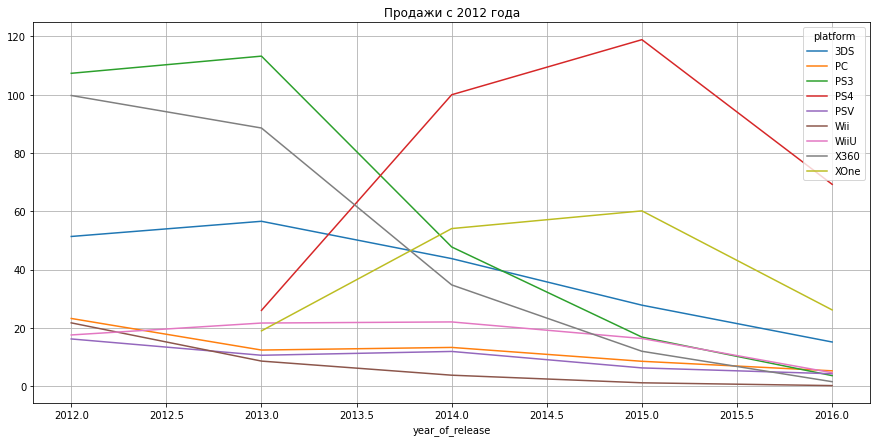

In [22]:
# график продаж с 2012 года
(
    df_since_2012.pivot_table(index = 'year_of_release', columns = 'platform', values = 'world_sales', aggfunc = ('sum'))
    .plot(grid=True, figsize = (15,7), title = 'Продажи с 2012 года'))
plt.show()

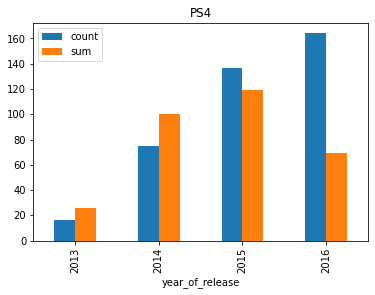

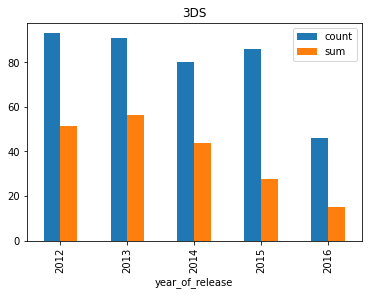

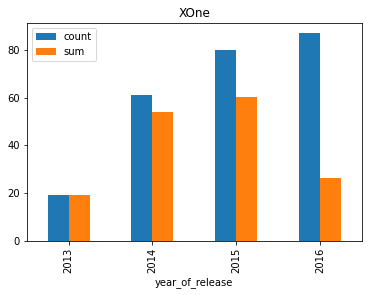

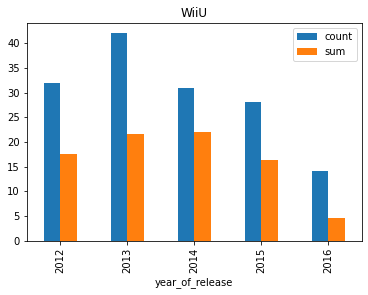

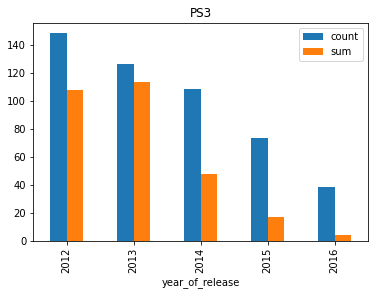

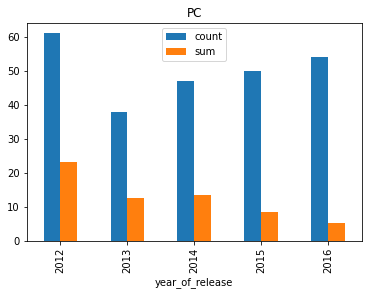

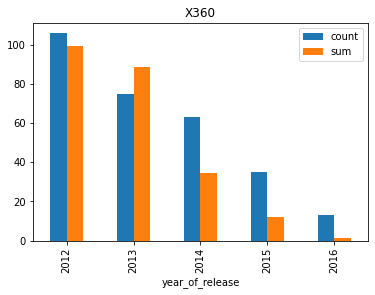

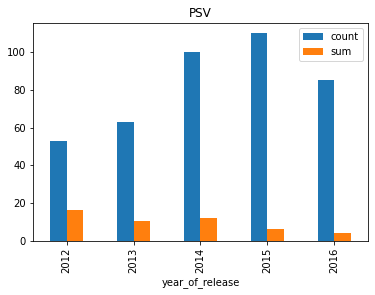

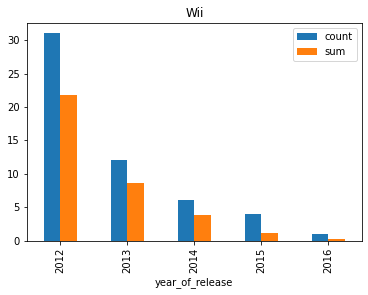

In [23]:
def bar(ff):
    (df_since_2012.query('platform == @ff')
     .pivot_table(index = 'year_of_release', values = 'world_sales', aggfunc = ('sum', 'count'))
     .plot(kind = 'bar', title = ff))
    
platforms_2016['platform'].apply(bar)
plt.show()


In [24]:
promising = ['PS4', 'XOne', 'PC'] # список потенциально прибыльных платформ
df_promising = df_since_2012.query('platform.isin(@promising)') # таблица отфильтрованная по списку пот-но приб-х платформ

In [25]:
# сумма продаж у каждой пот-но выг-й платформы
(df_promising.pivot_table(index = 'platform', values = 'world_sales', aggfunc = ('sum'))
                 .sort_values('world_sales', ascending = False))

,world_sales
platform,
PS4,314.14
XOne,159.32
PC,62.65


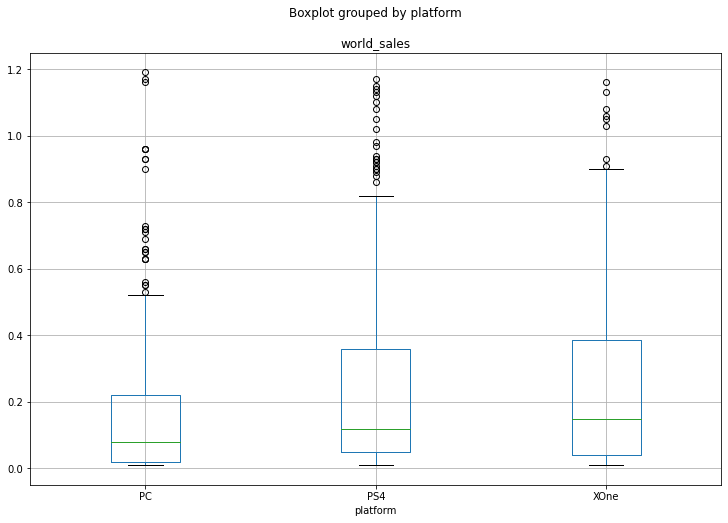

In [26]:
# боксплот 
df_promising.query('world_sales < 1.2').boxplot('world_sales', by = 'platform', figsize = (12,8))
plt.show()

In [27]:
# распределение
agg_func_describe = {'world_sales': ['describe']}
df_promising.groupby(['platform']).agg(agg_func_describe).round(4)

world_sales                                                
            describe                                                
               count    mean     std   min   25%   50%    75%    max
platform                                                            
PC             250.0  0.2506  0.4946  0.01  0.03  0.08  0.240   5.14
PS4            392.0  0.8014  1.6095  0.01  0.06  0.20  0.730  14.63
XOne           247.0  0.6450  1.0361  0.01  0.06  0.22  0.685   7.39

In [28]:
df_excl_tbd = df_promising.query('user_score != "tbd"') # таблица без tbd в user_score
df_excl_tbd['user_score'] = df_excl_tbd['user_score'].astype('float64') # перевод формата в float64

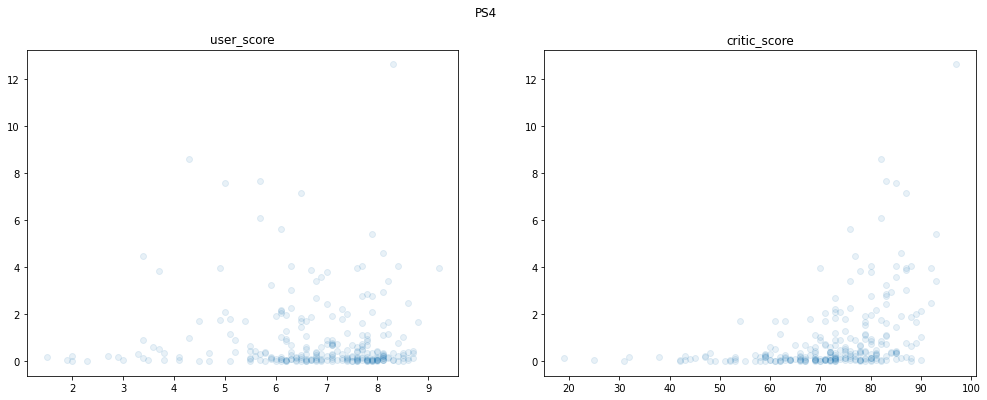

Корреляция Оценки пользователей/Продажи. -0.031957110204556376
Корреляция Оценки критиков/Продажи 0.40656790206178095


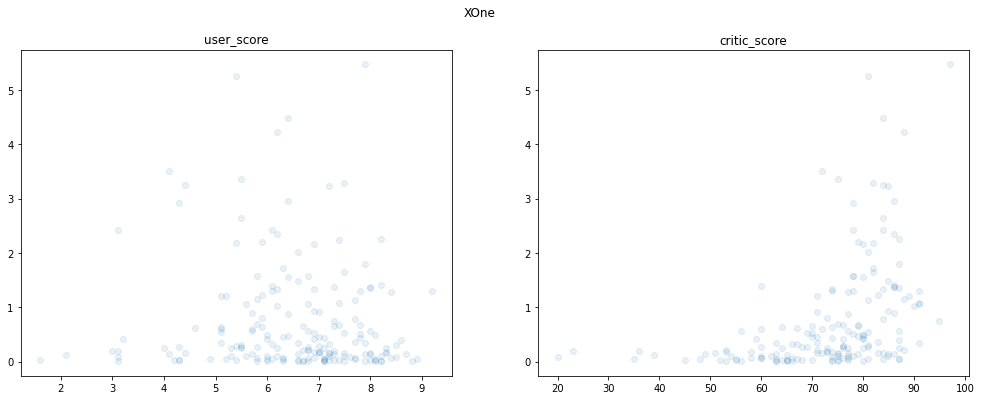

Корреляция Оценки пользователей/Продажи. -0.06892505328279414
Корреляция Оценки критиков/Продажи 0.4169983280084017


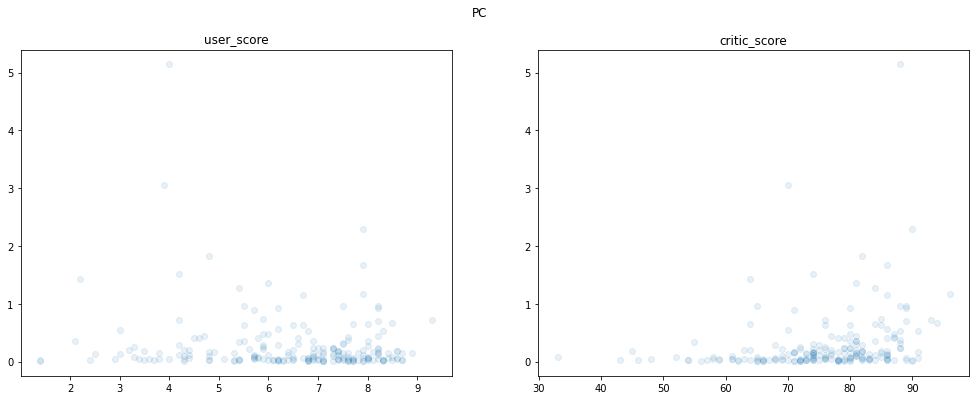

Корреляция Оценки пользователей/Продажи. -0.12186747630735577
Корреляция Оценки критиков/Продажи 0.23724324311567915


In [29]:
def scatter(platform):
    '''
    функция строит диаграмму рассеивания и корреляцию
    '''
    for i in platform:
        fig = plt.figure(figsize=(17, 6))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        ax1.set_title('user_score')
        ax2.set_title('critic_score')
        fig.suptitle(i)
# диаграмма пользовательская оценка/продажы
        ax1.scatter(
            df_excl_tbd.query('platform == @i')['user_score'], 
            df_excl_tbd.query('platform == @i')['world_sales'], 
            alpha = 0.1)
        
# диаграмма оценка критиков/продажы        
        ax2.scatter(
            df_promising.query('platform == @i')['critic_score'], 
            df_promising.query('platform == @i')['world_sales'], 
            alpha = 0.1)
        plt.show()
        
# корреляция пользовательская оценка/продажы        
        print('Корреляция Оценки пользователей/Продажи.', 
      df_excl_tbd.query('platform == @i')['user_score']
      .corr(df_excl_tbd.query('platform == @i')['world_sales']))
        
# корреляция оценка критиков/продажы                
        print('Корреляция Оценки критиков/Продажи', 
      df_promising.query('platform == @i')['critic_score']
      .corr(df_promising.query('platform == @i')['world_sales']))
        

scatter(promising) # запуск функции

In [30]:
# количество игр с оценкой критиков выше 60
df_promising.query('critic_score >= 60').groupby('platform')['name'].count()

platform
PC      183
PS4     218
XOne    148
Name: name, dtype: int64

In [31]:
# количество игр с оцнкой пользователей выше 6-ти
df_excl_tbd.query('user_score >= 6').groupby('platform')['name'].count()

platform
PC      136
PS4     203
XOne    128
Name: name, dtype: int64

In [32]:
# доля иггр с миллионными продажами. выпуск
df_promising.query('world_sales >= 1')['name'].count() / df_promising['name'].count()

0.15860517435320584

In [33]:
# доля иггр с миллионными продажами. продажи
df_promising.query('world_sales >= 1')['world_sales'].sum() / df_promising['world_sales'].sum()

0.7117755684467739

#### Описание действий  
Убрал платформы не выпускавшие игры в 2016 году.  
Посчитал суммарные продажи для каждой платформы с 2012 года.  
Посчитал продажи и количество выпущенных игр для каждой платформы ежегодно с 2012 года.  
Построил график продаж.
Построил столбчаттые диаграммы для каждой платформы. Ежегодный выпуск игр и продажи.  
Определил потенциально прибыльные платформы. И создал для них отдельный dataframe.  
Построил боксплот и расспределение.  
Построил диаграмму распределения для каждой платформы и корреляцию. Зависимость продаж от оценок критиков или покупателей.  
#### Вывод  
Для планирования компании в 2017 году, нет смысла анализировать платформы которые не выпускали игры в 2016. В 2016 году выпускали игры только 9 платформ: , '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV'. 
  
Анализ показал что портативные платформы ежегодно снижают выпуск игр, и продажи падают.  
За исключением PSV. Но у этой платформы низкие продажи по сравнению с другими, 8 место из 9.  
Возможно это связано с активным развитием игр на Смартфонах.
  
Из домашних платформ рост выпуска игр только у трех платформ 'PS3', 'X360', 'PC'.  
На остальных платформах выпуск игр и продажи падают.  
2016 год показывает падение продаж по всем платформам, но скорее всего потому что срок активных продаж дольше, и игры выпущенные в 2016 году будут продаваться и в 2017 году. Так же известно что данные 2016 года в dataframe не полные.  
  
Разброс продаж очень большой. Расспределение вправо. У XOne и PS4 Среднее на порядок выше медианы. У PC разброс меньше, но так же велик.

Судя по диаграмме рассеивания и коэффициенту корреляции, продажи игр не сильно зависят от оценок.  
Игр с оценкой выше 6-ти (пользователи) или 60-ти (критики), больше у PS4 (>200). PC на втором месте.  
Доля игр с миллиоными продажами 0.15. по количеству игр  
Доля игр с миллиоными продажами 0.71. по количеству продаж  

### Жанры

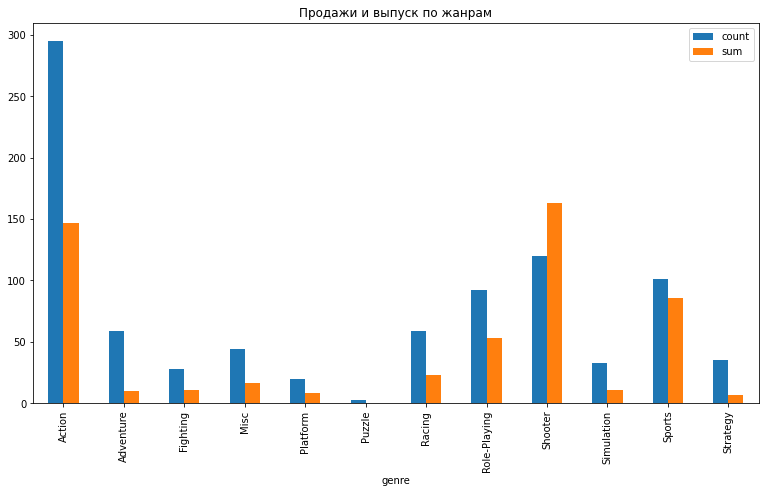

In [34]:
# столбчатая диаграмма
(
    df_promising.pivot_table(index = 'genre', values = 'world_sales', aggfunc = ('sum', 'count'))
    .plot(kind = 'bar', figsize = (13, 7), title = 'Продажи и выпуск по жанрам')
)
plt.show()

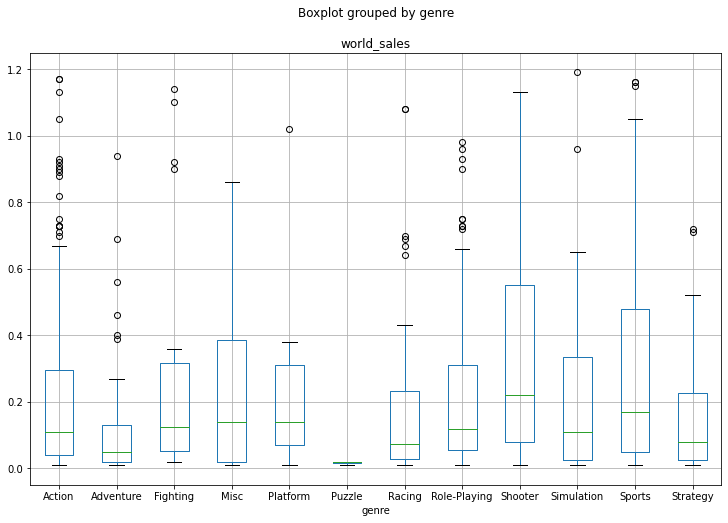

In [35]:
df_promising.query('world_sales < 1.2').boxplot('world_sales', by = 'genre', figsize = (12,8))
plt.show()

In [36]:
df_promising.pivot_table(
    index = 'genre', values = 'world_sales', aggfunc = sum
).sort_values('world_sales', ascending = False ).head(5)

,world_sales
genre,
Shooter,163.16
Action,146.55
Sports,85.61
Role-Playing,53.19
Racing,23.16


In [37]:
(163.16 + 146.55 + 85.61) / df_promising.world_sales.sum()

0.7373859842196565

In [38]:
df_promising.groupby('genre')['world_sales'].median().sort_values(ascending = False).reset_index()

,genre,world_sales
0,Shooter,0.540
1,Sports,0.260
2,Role-Playing,0.190
3,Misc,0.165
4,Platform,0.160
5,Fighting,0.155
6,Action,0.140
7,Simulation,0.120
8,Racing,0.100
9,Strategy,0.080


#### Вывод  
  
Больше всего выпускают и продают Action, Shooter, Sports.

## Шаг 4. Портрет пользователя каждого региона

In [66]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'] #список регионов

def pie(df, kind):
    fig, ax = plt.subplots( nrows = 1, ncols = 4, figsize=(18,18))
    for i in range(4):
        
        df1 = df.groupby(kind)[regions[i]].sum().sort_values(ascending=False).head(5).reset_index()
        ax[i].pie(df1[regions[i]], labels = df1[kind], autopct = '%1.1f%%', startangle=90)
        ax[i].set_title(df1.columns[1].split('_')[0].upper())



Популярные платформы:


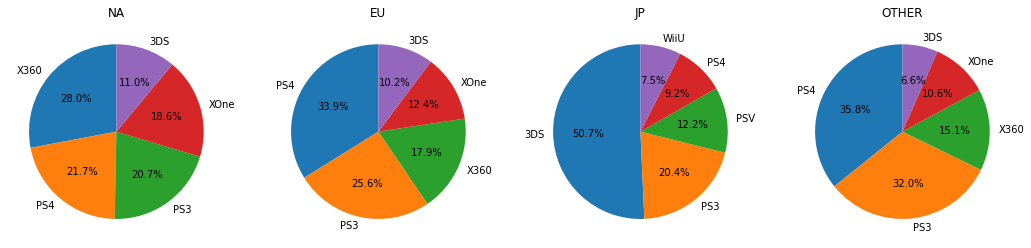

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


,platform,other_sales
0,PS4,48.35
1,PS3,43.26
2,X360,20.40
3,XOne,14.27
4,3DS,8.87



Популярные жанры:


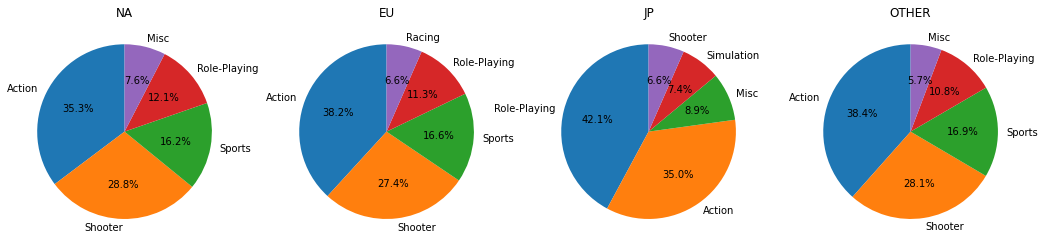

,genre,na_sales
0,Action,177.00
1,Shooter,144.77
2,Sports,81.38
3,Role-Playing,60.65
4,Misc,38.13


,genre,eu_sales
0,Action,158.43
1,Shooter,113.47
2,Sports,68.84
3,Role-Playing,46.76
4,Racing,27.29


,genre,jp_sales
0,Role-Playing,59.12
1,Action,49.18
2,Misc,12.45
3,Simulation,10.35
4,Shooter,9.23


,genre,other_sales
0,Action,50.93
1,Shooter,37.26
2,Sports,22.35
3,Role-Playing,14.38
4,Misc,7.62



Продажи по рейтингу:


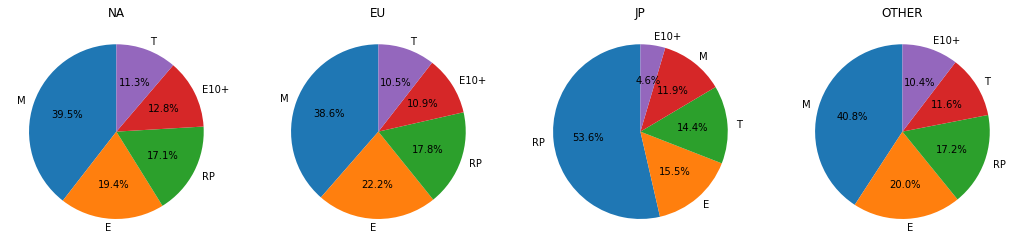

,rating,na_sales
0,M,231.57
1,E,113.44
2,RP,100.13
3,E10+,75.09
4,T,66.02


,rating,eu_sales
0,M,193.96
1,E,111.79
2,RP,89.32
3,E10+,54.84
4,T,52.96


,rating,jp_sales
0,RP,95.62
1,E,27.62
2,T,25.76
3,M,21.20
4,E10+,8.19


,rating,other_sales
0,M,63.38
1,E,31.13
2,RP,26.70
3,T,17.94
4,E10+,16.13


In [67]:
print(f'\nПопулярные платформы:')
pie(df_since_2012, 'platform')
plt.show()        
for i in range(4):
    display(df_since_2012.groupby('platform')[regions[i]].sum().sort_values(ascending=False).head(5).reset_index())

print(f'\nПопулярные жанры:')
pie(df_since_2012, 'genre')
plt.show()        
for i in range(4):
    display(df_since_2012.groupby('genre')[regions[i]].sum().sort_values(ascending=False).head(5).reset_index())
    
print(f'\nПродажи по рейтингу:')
pie(df_since_2012, 'rating')
plt.show()        
for i in range(4):
    display(df_since_2012.groupby('rating')[regions[i]].sum().sort_values(ascending=False).head(5).reset_index())

### Вывод  
  
Определил топ-5 платформ и жанров по регионам.  
* Платформы - рейтинг в Европе и других странах не отличается. Лидирует PS 4я и 3я, затем Microsoft X360 и XOne, замыкает Nintendo 3DS.    
В Северной Америке топ-5 такой-же, с другим порядком. *X360, PS 4я и 3я, XOne, 3DS.*  
Выбор японцев отличяается. *3DS, PS3, PSV, PS4, WiiU.*  
* Жанры - Северная Америка и другие страны солидарны в своем выборе. *Action, Shooter, Sports, Role-Playing, Misc.*  
Европейци первые 4 позиции такие же, на пятое место вышел жанр *Racing*  
В жанрах Япония так же не похожа на остальных. *Role-Playing, Action, Misc, Simulation, Shooter*  

Провести анализ по ESRB проблематично. Слишком много игр с неопределенным рейтингом. Такие игры занимают 3-е места в рейтинге продаж, а в Японии 1-е.  
Что точно можно сказать, игры с рейтингом M (для взрослых) лидируют везде кроме Японии. И с рейтингом E (для всех) так же имеют высокую популярность.

## Шаг 5. Проверка гипотез

**Гипотеза 1**  
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [41]:
alpha = 0.05 # пороговое значение

results = st.ttest_ind(
    df_excl_tbd.query('platform == "XOne" and user_score.isna() == False').user_score, 
    df_excl_tbd.query('platform == "PC" and user_score.isna() == False').user_score, 
    equal_var = False) # тест

print('p-значение:', results.pvalue) # уровень значимости

# сравнение уровня значимости и порогового значения
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Гипотеза 2**  
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.  
H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [42]:
alpha = 0.05 # пороговое значение

results = st.ttest_ind(
    df_excl_tbd.query('genre == "Action" and user_score.isna() == False').user_score, 
    df_excl_tbd.query('genre == "Sports" and user_score.isna() == False').user_score, 
    equal_var = False) # тест

print('p-значение:', results.pvalue) # уровень значимости

# сравнение уровня значимости и порогового значения
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.0473472331775313e-10
Отвергаем нулевую гипотезу


### Вывод  
  
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.  
Т.к. обе гипотезы являются двухсторонними и независимыми я выбрал метод st.ttest_ind для проверки о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.  
  
Тест подтвердил гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.  
И отверг гипотезу о равенстве средних пользовательских рейтингах жанров Action и Sports.

## Шаг 6. Общий вывод

Платформы для игр имеют срок жизни. В среднем 7-8 лет. Рост популярности и падение 3-4 года.  
В 2016 году действующих платформ 9 видов. 6 домашних и 3 портативных.  
Портативные платформы показывают стабильный спад выпуска игр и продаж. Возможно это связано с развитием Смартфоном и планшетов.  
  
Самые популяпные платформы производства Sony Playstation и Microsoft.  У них две самые свежие платформы 2013 года PS4 и XOne.  На этих платформах растет количество выпускаемых игр. в 2016 году выпущено много игр, но их потенциал (количество продаж) еше не реализован.  
Поэтому мои рекомендации сосредоточится именно на PS4 и XOne.  
  
Так же стоит рассмотреть PC, не смотря на не самый высокие продажи игр. Персональные компьютеры и ноутбуки не теряют свою актуальность, не наблюдается спадов по выпуску и продажам игр.  
  
Исключением является Япония, у них остаются популярными портативные платформы 3DS и PSP. И не входит в топ-5 XOne.
Возможно для Японии стоит продумать отденльную стратегию и рекламную компанию.  
  
Возможно стоит сделать отдельный акцент на жанре игр. Самые активные продажи у Action, Shooter, Sports. Их доля для PS4, XOne и PC составляет 0,73. Но Action поддерживает большие продажи за счет большого выпуска игр, и 2-3 игр которые выстрелили. По медиане Action лиш на 6 месте.  
Это релевантно для всех регионов, кроме Японии. Role-Playing на первом месте, Sports не входит в топ-5, а Shooter всего лиш на 5-м.  
Что подтверждает предложение об отдельной компании для Японии.  
  

Ответить на вопрос стоит ли ориентироваться на рейтинг ESRB, не представляется возможным. Слишком много игр без рейтинга (или не присвоин, или нет информации).  
  
Рейтинги игр не влияют на увеличение продаж. Можно сказать что если рейтинг высокий, то ее купят, но не факт что больше миллиона копий. Игры с миллионными продажами это скорее исключение - блокбастеры в мире игр.  
Количество игр с продажами больше 1 млн. копий 15%. При этом они генерируют 71% продаж.

  